In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Tutorial

This notebook shoes an example of how to use the datasets in this repo.

## Load dataset into a dataloader and inspect it

In [ ]:
from image_folder_datasets.core import ImageFolderDataModule

data_dir = 'Datasets/Affective_Image_Classification_Using_Features_inpired_by_Psychology_and_Art_Theory'
dm = ImageFolderDataModule(data_dir, 32)

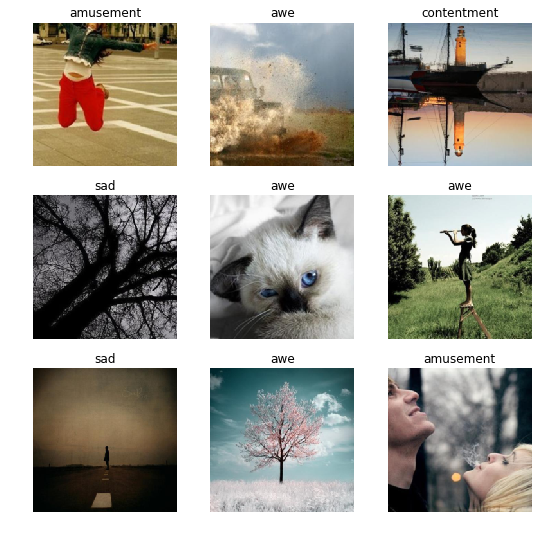

In [ ]:
dm.setup()
dm.dls.show_batch()

## Train a CNN from scratch

You don't have to follow this method, the ImageFolderDataModule is just a pytorch-lightning data module.

In [ ]:
class MNISTModel(pl.LightningModule):

    def __init__(self):
        super(MNISTModel, self).__init__()
        self.l1 = torch.nn.Linear(28 * 28, 10)

    def forward(self, x):
        return torch.relu(self.l1(x.view(x.size(0), -1)))

    def training_step(self, batch, batch_nb):
        x, y = batch
        loss = F.cross_entropy(self(x), y)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)

NameError: name 'pl' is not defined

In [ ]:
!pip insta